# Dense Neural Networks


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# get some important modules
import pandas as pd # for data wrangling
import numpy as np # for array calculations, some math functions
from matplotlib import pyplot as plt #for plotting

In [ ]:
# read in some data
df = pd.read_csv("/content/drive/My Drive/Spring 2020 Materials/Week 1/Module1/Script and Data/Boston Housing.csv")

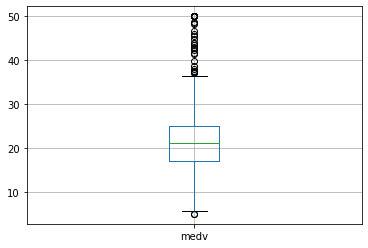

In [ ]:
# do some EDA if you'd like
# see the other Boston Housing EDA script
# boxplots, scatterplots, kde plots
df.boxplot('medv')

In [ ]:
# shape
df.shape

(506, 14)

In [ ]:
# column names
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [ ]:
# column types
df.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

## A very first model
Let's fit a NN with a simple 80/20 split

In [ ]:
# split our data into X and y
y = df['medv']
# we can use .iloc to select rows columns by index
# this means all rows
X = df.iloc[:,0:13]

In [ ]:
# min/max normalization
from sklearn import preprocessing

X = X.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(X_scaled)

In [ ]:
# basic data splitting
from sklearn.model_selection import train_test_split

# basic data holdout
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# check out the shape of everything
print("This is the train shape:" + str(X_train.shape))
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(df.shape)

This is the train shape:(404, 13)
(102, 13)
(404,)
(102,)
(506, 14)


In [ ]:
# let's build our first basic NN!
# see p. 74 or so in Chollet
# note that we haven't standardized our data yet,
# but that's OK for our very first NN

from tensorflow.keras import layers, Sequential

# this simply sets up the model, 
model = Sequential() # like a blank canvas... I'm building a Neural Network
# first hidden layer
model.add(layers.Dense(64, #64 hidden units - 64 representations of data
                       activation='relu', # turns negative numbers into... 0s!
                        input_shape=(X_train.shape[1],))) # specify the input shape (only need once)
# turn off a random 30% of the network at a time (for each weight update)
model.add(layers.Dropout(0.3)) # random 30% turned off

# second hidden layer
model.add(layers.Dense(62, activation='relu')) # 32 representations of data, or nonlinear partial correlations
model.add(layers.Dropout(0.1)) # turn OFF a random 10% of the network to force different branches/weights

# third hidden layer
model.add(layers.Dense(32, activation='relu')) # 32 representations of data, or nonlinear partial correlations
model.add(layers.Dropout(0.1)) # turn OFF a random 10% of the network to force different branches/weights

# fourth hidden layer
model.add(layers.Dense(10, activation='relu')) # 32 representations of data, or nonlinear partial correlations
model.add(layers.Dropout(0.1)) # turn OFF a random 10% of the network to force different branches/weights


# output layer/node
model.add(layers.Dense(1)) # the activation function here is 'linear' by default
# linear allows for predictions between -Inf to Inf

In [ ]:
#  this compiles the model, specifies model evaluation metrics
# but doesn't run the model yet
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [ ]:
# now run the model!
# let's store this as "history"
history = model.fit(X_train, y_train,  # train data
          validation_data=(X_test, y_test), # validation data
          epochs=100,  # this is a hyperparameter that can be tuned
          batch_size=10,  # this is a hyperparameter that can be tuned
          verbose=1) # 0 = dont show verbose, 1 = show it!


Epoch 1/100
41/41 [==============================] - 0s 7ms/step - loss: 498.1193 - mae: 20.2886 - val_loss: 379.8402 - val_mae: 17.0722
Epoch 2/100
41/41 [==============================] - 0s 6ms/step - loss: 295.2862 - mae: 14.3709 - val_loss: 166.8787 - val_mae: 10.0367
Epoch 3/100
41/41 [==============================] - 0s 5ms/step - loss: 164.3703 - mae: 9.9441 - val_loss: 101.0484 - val_mae: 7.2678
Epoch 4/100
41/41 [==============================] - 0s 5ms/step - loss: 111.9479 - mae: 8.0908 - val_loss: 82.2763 - val_mae: 6.4941
Epoch 5/100
41/41 [==============================] - 0s 5ms/step - loss: 99.5909 - mae: 7.4657 - val_loss: 74.3763 - val_mae: 5.7743
Epoch 6/100
41/41 [==============================] - 0s 6ms/step - loss: 78.2143 - mae: 6.5715 - val_loss: 64.8085 - val_mae: 5.5062
Epoch 7/100
41/41 [==============================] - 0s 5ms/step - loss: 66.3969 - mae: 5.8462 - val_loss: 61.8940 - val_mae: 5.4509
Epoch 8/100
41/41 [==============================] - 0s 5m

In [ ]:
"""
 Note that the call to model.fit() returns a History object. 
 This object has a member history, which is a dictionary containing data 
 about everything that happened
during training. Let’s look at it:

>>> history_dict = history.history
>>> history_dict.keys()
"""

history_dict = history.history
history_dict.keys() 

# out of all of these, let's plot the val_mean_absolute_error

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

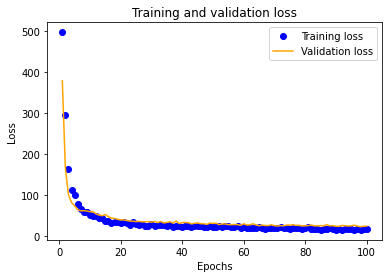

In [ ]:
# let's see the training and validation accuracy by epoch
history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) #acc wasn't defined before
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# we can look for the min value in the validation
# and that's how we update our model and re-rerun
# in our case, it looks like this happens around 100 epochs
resultDF = pd.DataFrame(history_dict)
resultDF.head()

,loss,mae,val_loss,val_mae
0,498.119324,20.288568,379.840240,17.072229
1,295.286194,14.370872,166.878708,10.036700
2,164.370300,9.944109,101.048416,7.267835
3,111.947876,8.090803,82.276283,6.494064
4,99.590935,7.465653,74.376335,5.774340


In [ ]:
# show the row where you have a min value
resultDF.loc[resultDF['val_loss'] == min(resultDF['val_loss'])]
# so later on, we will re-run for what this min would be epochs
# if you set a random seed, you'd get the same answers.

,loss,mae,val_loss,val_mae
97,15.297798,2.861026,23.144508,3.064058


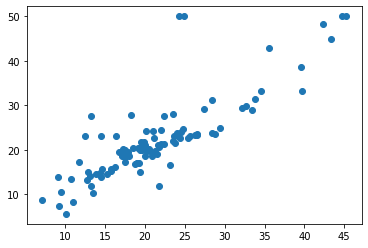

In [ ]:
# we can show how our model fit - notice that it runs
# for all 300 epochs - it didn't stop even if we 
# started getting overfit results
myPreds = model.predict(X_Train)
myActual = y_Train

# import matplotlib
plt.scatter(myPreds, myActual)

In [ ]:
# we can get the results from our model
results = model.evaluate(X_test, y_test)
results # this shows the loss (raw value), and your metric (MAE)

4/4 [==============================] - 0s 2ms/step - loss: 22.1081 - mae: 3.0936


[22.108051300048828, 3.0936145782470703]

In [ ]:
# you can also calculate it from your results
# left as an exercise from the students (MAE, RMSE, MAPE if not too many zeros)
# link: https://www.dataquest.io/blog/understanding-regression-error-metrics/

print(type(myPreds)) # numpy.ndarray
print(type(myActual)) # pandas Series

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


In [ ]:
# flatten the 1-D numpy array
myPreds = np.ndarray.flatten(myPreds)
myPreds

array([24.366447 , 24.25392  , 25.62575  , 10.934474 , 19.646885 ,
       19.6665   , 21.736908 , 20.85972  , 16.249647 , 17.167656 ,
        7.0716753, 11.702732 , 14.313288 ,  9.490281 , 44.701405 ,
       33.393143 , 23.675505 , 39.759857 , 32.17106  , 21.594667 ,
       23.995909 , 21.4416   , 18.460758 , 27.461487 , 20.913113 ,
       12.513064 , 17.876123 , 16.742496 , 39.536003 , 18.015972 ,
       15.275333 , 17.457716 , 19.72353  , 20.447659 , 26.478317 ,
       18.761883 , 10.045512 , 24.890438 , 13.884739 , 12.728947 ,
       24.524637 , 19.362144 , 21.260708 , 14.4281025, 23.147799 ,
       23.807346 , 19.14471  , 18.971594 , 13.219647 , 22.36725  ,
       15.679651 , 16.379473 , 21.01969  , 35.55837  , 14.613085 ,
       19.482891 , 19.267916 , 17.492275 , 12.843841 , 19.886667 ,
       20.005013 , 20.024796 , 34.51314  , 33.79132  , 17.24121  ,
       32.726734 , 15.745659 , 19.336857 , 13.189475 , 21.129843 ,
       20.176384 , 21.994774 , 28.728655 , 28.444454 , 28.3695

In [ ]:
# we can put the predictions side by side
# need to drop the index
myPreds = pd.DataFrame(myPreds)
myPreds.reset_index(drop=True)
myPreds.rename(columns={0: "MyPreds"}, inplace=True)
myPreds.dtypes
myPreds.head()

,MyPreds
0,24.366447
1,24.253920
2,25.625750
3,10.934474
4,19.646885


In [ ]:
# your actual predictions
# note, I put these in a numpy array
# since the index was being annoying
myActual = pd.DataFrame(np.array(y_test))
myActual.reset_index(drop=True)
myActual.rename(columns={0: "MyActual"}, inplace=True)
myActual.dtypes
myActual.head()

,MyActual
0,22.6
1,50.0
2,23.0
3,8.3
4,21.2


In [ ]:
allResults = pd.concat([myPreds, myActual], axis=1)
allResults.head()

,MyPreds,MyActual
0,24.366447,22.6
1,24.253920,50.0
2,25.625750,23.0
3,10.934474,8.3
4,19.646885,21.2


In [ ]:
# you can then calculate all sorts of metrics
# on this dataframe
allResults['AbsErr'] = abs(allResults['MyPreds'] - allResults['MyActual'])
allResults.head()
# now it's easy to calculate MAE
print(np.mean(allResults['AbsErr']))

# which is the same as:
model.evaluate(X_test, y_test)

# think of all the other regression metrics you can make!

# I much prefer to have control of my results
# like this! You can imagine how nice it is
# to extract TPR, TFR and other things for a 
# classification problem

# and you can also imagine how nice it is
# for a k-fold cross-validation! 
# just need to add fold information

3.0936143276738197
4/4 [==============================] - 0s 2ms/step - loss: 22.1081 - mae: 3.0936


[22.108051300048828, 3.0936145782470703]

In [ ]:
# this is how we can save a .csv to our Google Drive
allResults.to_csv('/content/drive/My Drive/Spring 2020 Materials/Week 1/Module1/Script and Data/test.csv')

# if we need to make a new directory, we could do:
# link: https://stackoverflow.com/questions/54172874/making-two-new-directory-in-google-colab-and-join-them
import tensorflow as tf

#Create a new directory (a folder) in your Drive
tf.io.gfile.mkdir('/content/drive/My Drive/Spring 2020 Materials/Week 1/Module1/Script and Data/My First NN Results')
allResults.to_csv('/content/drive/My Drive/Spring 2020 Materials/Week 1/Module1/Script and Data/My First NN Results/Results_NN_SimpleHoldout.csv')

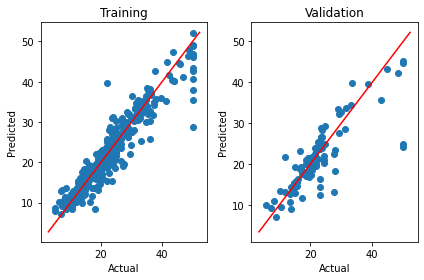

In [ ]:
# TO DO: make it a nice subplot for training and validation
# results, with a nice axes and a main title,
# then save the image to your Google Drive
# a long with a .csv of actual vs. predicted results

# nice link: https://matplotlib.org/gallery/subplots_axes_and_figures/figure_title.html

# specify the dimensions 
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# add a main title across top
#fig.suptitle("My Results", fontsize=20)

# 	val_loss	val_mean_absolute_error	loss	mean_absolute_error

# this makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=model.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_test, y=model.predict(X_test)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# by adding this line of code, we can save our plot to our Google Drive
# link: https://chartio.com/resources/tutorials/how-to-save-a-plot-to-a-file-using-matplotlib/
plt.savefig('/content/drive/My Drive/Spring 2020 Materials/Week 1/Module1/Script and Data/My First NN Results/Results Plot.png')

# show the plot
plt.show()

## Re-run the model for 100 epochs
since this is the best fit of the model

In [ ]:
# let's try to re-run the model for 100 epochs
# then we can save the results

## Introducing Early-Stopping
It would be nice if our model would stop once it stops overfitting. 

Here's a nice link: https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/

In [ ]:
# don't forget you can also include patience (if you want)
# simple early stopping
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', 
                   # LOOK HOW QUICK IT STOPS IF YOU DON'T USE
                   # PATIENCE - SUBJECT TO NOISE!!!
                   # will vary based on every problem you tackle
                   # try a patience of 2, 5, 10, 50, 100...
                   # what do you notice?
                   patience=50, 
                   verbose=1)
# fit model
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=4000, 
                    verbose=1, 
                    callbacks=[es]) #notice we won't have to manually watch it
                    # 

Epoch 1/4000
13/13 [==============================] - 0s 9ms/step - loss: 16.6967 - mae: 2.9789 - val_loss: 23.1939 - val_mae: 3.0728
Epoch 2/4000
13/13 [==============================] - 0s 8ms/step - loss: 14.8427 - mae: 2.8107 - val_loss: 21.3655 - val_mae: 3.0995
Epoch 3/4000
13/13 [==============================] - 0s 8ms/step - loss: 14.8718 - mae: 2.8037 - val_loss: 21.6387 - val_mae: 3.0531
Epoch 4/4000
13/13 [==============================] - 0s 8ms/step - loss: 17.0665 - mae: 2.9433 - val_loss: 20.9626 - val_mae: 3.0922
Epoch 5/4000
13/13 [==============================] - 0s 8ms/step - loss: 17.5880 - mae: 2.9166 - val_loss: 21.4800 - val_mae: 3.0522
Epoch 6/4000
13/13 [==============================] - 0s 8ms/step - loss: 16.5172 - mae: 2.9127 - val_loss: 21.7624 - val_mae: 3.0441
Epoch 7/4000
13/13 [==============================] - 0s 8ms/step - loss: 15.3547 - mae: 2.8051 - val_loss: 20.6347 - val_mae: 3.0582
Epoch 8/4000
13/13 [==============================] - 0s 9ms/s

In [ ]:
# how long did it run for? 
# let's try to extract from history.history
x = np.array(history.epoch)
x = max(x)
print("We should re-run for this many epochs: ", x)

We should re-run for this many epochs:  164


In [ ]:
# later, we should try to save the model (checkpointing)
# and we could try loading it at a later time...
# maybe save this for Week 2

You can grab all that plotting code from before if you want.

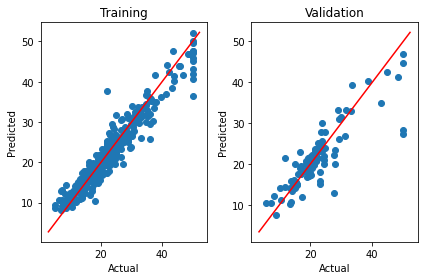

In [ ]:
# TO DO: make it a nice subplot for training and validation
# results, with a nice axes and a main title,
# then save the image to your Google Drive
# a long with a .csv of actual vs. predicted results

# nice link: https://matplotlib.org/gallery/subplots_axes_and_figures/figure_title.html

# specify the dimensions 
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# add a main title across top
#fig.suptitle("My Results", fontsize=20)

# 	val_loss	val_mean_absolute_error	loss	mean_absolute_error

# this makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=model.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_test, y=model.predict(X_test)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# by adding this line of code, we can save our plot to our Google Drive
# link: https://chartio.com/resources/tutorials/how-to-save-a-plot-to-a-file-using-matplotlib/
plt.savefig('/content/drive/My Drive/Spring 2020 Materials/Week 1/Module1/Script and Data/My First NN Results/Results Plot_es.png')

# show the plot
plt.show()

## Try a k-fold example

In [ ]:
# in the book, you will see k-fold validation examples
# we will get there later on, 
# along with standardizing our data

# as a reference, you can look at Listing 4.2 in Chollet
k=4
num_validation_samples = len(df) // k
num_validation_samples

# I prefer not to code this way though...
# here's how I would do it...

126

In [ ]:
# peak at the data
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
# shuffle the df
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,3.84970,0.0,18.10,1,0.770,6.395,91.0,2.5052,24,666,20.2,391.34,13.27,21.7
1,0.03041,0.0,5.19,0,0.515,5.895,59.6,5.6150,5,224,20.2,394.81,10.56,18.5
2,0.24103,0.0,7.38,0,0.493,6.083,43.7,5.4159,5,287,19.6,396.90,12.79,22.2
3,0.62976,0.0,8.14,0,0.538,5.949,61.8,4.7075,4,307,21.0,396.90,8.26,20.4
4,73.53410,0.0,18.10,0,0.679,5.957,100.0,1.8026,24,666,20.2,16.45,20.62,8.8


In [ ]:
print(df.columns)
print(df.shape)

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')
(506, 14)


Tthere are a bunch of loss functions that can be optimized off of, 
and a bunch of error metrics can be checked out.

https://keras.io/metrics/
https://keras.io/losses/

In [ ]:
# kfold with code
# link: https://machinelearningmastery.com/evaluate-performance-deep-learning-models-keras/
# note that the example in the link uses input_dim instead of input_shape
from tensorflow.keras import layers, Sequential
from sklearn.model_selection import KFold
import numpy
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load dataset as numpy array
dataset = df.values
# split into input (X) and output (Y) variables
X = dataset[:,0:13] # up to incluing column 13
Y = dataset[:,13] # column 14 (but numbered 13, cause of Python)

# here's some code from before
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='loss', 
                   mode='min', 
                   # try a patience of 2, 5, 10, 50, 100...
                   patience=10, 
                   verbose=1)
# define 10-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
# let's define a blank space to store our error metrics
cvscores = []
# and also a blank place to store the epochs
epochDF = []
# counter 
counter = 0

# start the for loop
for train, test in kfold.split(X, Y):
  # print counter
  counter = counter + 1
  print("Fold Index = ",counter)
  # create the model
  model = Sequential()
  model.add(layers.Dense(64, input_shape=(13,)))
  model.add(layers.Dense(8,activation='relu'))
  model.add(layers.Dense(1))
  # compile the model
  model.compile(optimizer='rmsprop', 
                loss='mae', # try mse or mae
                metrics=['mae'])
  # fit the model
  history = model.fit(X[train], 
                        Y[train],
                        epochs=100,
                        batch_size=10,
                        verbose=0,
                        callbacks=[es])
  # evaluate the model
  scores = model.evaluate(X[test], Y[test], verbose=0)
  # number of epochs
  x = max(np.array(history.epoch))
  # save the scores
  cvscores.append(scores)
  # save the epochs
  epochDF.append(x)
  print(scores, x)


Fold Index =  1
[4.745976448059082, 4.71177864074707] 99
Fold Index =  2
Epoch 00034: early stopping
[9.620475769042969, 9.457828521728516] 33
Fold Index =  3
Epoch 00100: early stopping
[6.90367317199707, 6.656145095825195] 99
Fold Index =  4
Epoch 00077: early stopping
[4.013745307922363, 3.8723390102386475] 76
Fold Index =  5
Epoch 00078: early stopping
[4.290441513061523, 4.208205223083496] 77
Fold Index =  6
Epoch 00073: early stopping
[4.045874118804932, 4.059146881103516] 72
Fold Index =  7
Epoch 00056: early stopping
[3.9855237007141113, 4.1753764152526855] 55
Fold Index =  8
[5.990116119384766, 6.073483467102051] 99
Fold Index =  9
Epoch 00079: early stopping
[5.48539924621582, 6.020908832550049] 78
Fold Index =  10
Epoch 00037: early stopping
[14.241410255432129, 13.885615348815918] 36


In [ ]:
# this shows an index of all records in train
print(train.shape)
print(X[train].shape)
train

(456,)
(456, 13)


array([  1,   2,   3,   4,   5,   7,   8,   9,  10,  11,  12,  13,  14,
        15,  16,  17,  18,  19,  20,  21,  22,  24,  26,  27,  28,  29,
        30,  31,  32,  33,  34,  35,  36,  37,  39,  40,  41,  43,  45,
        46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,
        59,  60,  61,  62,  63,  64,  65,  66,  69,  70,  71,  73,  74,
        76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,
        89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101,
       102, 104, 105, 106, 107, 108, 109, 110, 111, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 153, 154, 155, 156, 157,
       158, 159, 160, 161, 162, 163, 164, 165, 166, 168, 169, 170, 171,
       172, 173, 174, 176, 177, 178, 179, 180, 181, 182, 184, 186, 187,
       188, 190, 192, 193, 194, 195, 197, 198, 199, 200, 202, 20

In [ ]:
# this shows an index of all records in test
print(test.shape)
print(X[test].shape)
test

(50,)
(50, 13)


array([  0,   6,  23,  25,  38,  42,  44,  67,  68,  72,  75, 103, 112,
       137, 152, 167, 175, 183, 185, 189, 191, 196, 201, 211, 218, 250,
       251, 260, 275, 290, 311, 312, 325, 343, 345, 348, 366, 383, 391,
       392, 398, 407, 428, 432, 437, 444, 448, 470, 486, 502])

In [ ]:
# could also save the datasets as we went along if we wanted to
# we could also put this in a pandas dataframe for analysis
resultDF = pd.DataFrame(cvscores)
# add the epochs it took
resultDF['epochs'] = epochDF
# change column names
resultDF.columns = ['loss', 'mae', 'epochs']
# show the results!
resultDF # WHOA! one is real bad...

,loss,mae,epochs
0,4.745976,4.711779,99
1,9.620476,9.457829,33
2,6.903673,6.656145,99
3,4.013745,3.872339,76
4,4.290442,4.208205,77
5,4.045874,4.059147,72
6,3.985524,4.175376,55
7,5.990116,6.073483,99
8,5.485399,6.020909,78
9,14.241410,13.885615,36


In [ ]:
# now you can calculate average(MAE)
print(round(np.mean(resultDF['mae']),2))
# show the std dev
print(round(np.std(resultDF['mae']),2))
# as well as the number of epochs
print(np.mean(resultDF['epochs']))

6.31
3.0
72.4


# Model checkpointing


# Implement this model



In [ ]:
# kfold with code
# link: https://machinelearningmastery.com/evaluate-performance-deep-learning-models-keras/
# note that the example in the link uses input_dim instead of input_shape

from tensorflow.keras import layers, Sequential
from sklearn.model_selection import KFold
import numpy
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load dataset as numpy array
dataset = df.values
# split into input (X) and output (Y) variables
X = dataset[:,0:13] # up to incluing column 13
Y = dataset[:,13] # column 14 (but numbered 13, cause of Python)

# create the model
model = Sequential()
model.add(layers.Dense(64, input_shape=(13,)))
model.add(layers.Dense(8,activation='relu'))
model.add(layers.Dense(1))
# compile the model
model.compile(optimizer='rmsprop', 
              loss='mae', # try mse or mae
              metrics=['mae'])
# fit the model
history = model.fit(X, 
                    Y,
                    epochs=1000,
                    batch_size=10,
                    validation_split=0.2,
                    verbose=1,
                    callbacks=[es])
# evaluate the model
scores = model.evaluate(X, Y, verbose=0)
# number of epochs
x = max(np.array(history.epoch))
print(scores, x)


Epoch 1/1000
41/41 [==============================] - 0s 6ms/step - loss: 13.5622 - mae: 13.7041 - val_loss: 20.3785 - val_mae: 20.2159
Epoch 2/1000
41/41 [==============================] - 0s 4ms/step - loss: 11.5574 - mae: 11.3795 - val_loss: 10.2139 - val_mae: 9.9932
Epoch 3/1000
41/41 [==============================] - 0s 4ms/step - loss: 10.6642 - mae: 10.6199 - val_loss: 12.7553 - val_mae: 13.2596
Epoch 4/1000
41/41 [==============================] - 0s 5ms/step - loss: 10.2381 - mae: 10.1583 - val_loss: 8.8256 - val_mae: 8.6431
Epoch 5/1000
41/41 [==============================] - 0s 4ms/step - loss: 9.8781 - mae: 9.7934 - val_loss: 8.1602 - val_mae: 8.0315
Epoch 6/1000
41/41 [==============================] - 0s 5ms/step - loss: 9.8233 - mae: 9.8752 - val_loss: 5.5649 - val_mae: 5.5544
Epoch 7/1000
41/41 [==============================] - 0s 4ms/step - loss: 10.2392 - mae: 10.2277 - val_loss: 5.4704 - val_mae: 5.5417
Epoch 8/1000
41/41 [==============================] - 0s 4ms/

# Saving and Loading Model

In [ ]:
# save model and architecture to single file
from tensorflow.keras.models import save_model
save_model(model,filepath="/content/drive/My Drive/Spring 2020 Materials/Week 1/Module1/Script and Data/My First NN Results/Saved_DNN_Model.h5")

In [ ]:
# load and evaluate a saved model
from tensorflow.keras.models import load_model
# load model
model = load_model('/content/drive/My Drive/Spring 2020 Materials/Week 1/Module1/Script and Data/My First NN Results/Saved_DNN_Model.h5')
# summarize model.
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_66 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_67 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_68 (Dense)             (None, 1)                 9         
Total params: 1,425
Trainable params: 1,425
Non-trainable params: 0
_________________________________________________________________
